In [2]:
%load_ext autoreload
%autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from util import ADD_data_loader, combineDF, filteringDF, getFreeSpacePathLoss, makeXforGraph
from equationmodel_ann import ann_learning, ann_train_graph, prediction_error

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

In [3]:
%autoreload

iksan_fileList = {'../data/PLdata_iksan_wt_400.csv':[('frequency', np.log10(400)), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_iksan_wt_1399.csv':[('frequency', np.log10(1399)), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_iksan_wt_2249.csv':[('frequency', np.log10(2249)), ('heightTB',30), ('heightB',15), ('heightM',2)]}
nonsan_fileList = {'../data/PLdata_nonsan_wt_400.csv':[('frequency', np.log10(400)), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_nonsan_wt_1399.csv':[('frequency', np.log10(1399)), ('heightTB',30), ('heightB',15), ('heightM',2)],
            '../data/PLdata_nonsan_wt_2249.csv':[('frequency', np.log10(2249)), ('heightTB',30), ('heightB',15), ('heightM',2)]}
paju_fileList = {'../data/PLdata_paju_wt_400.csv':[('frequency', np.log10(400)), ('heightTB',100), ('heightB',7), ('heightM',2)],
            '../data/PLdata_paju_wt_1399.csv':[('frequency', np.log10(1399)), ('heightTB',100), ('heightB',7), ('heightM',2)],
            '../data/PLdata_paju_wt_2249.csv':[('frequency', np.log10(2249)), ('heightTB',100), ('heightB',7), ('heightM',2)]}

addIksan = ADD_data_loader(iksan_fileList)
addNonsan = ADD_data_loader(nonsan_fileList)
addPaju = ADD_data_loader(paju_fileList)

addData = combineDF([addIksan, addNonsan, addPaju])
# print(addData.describe())
addData = filteringDF(addData, 'heightTM', [10,100])
# print(addData.describe())

addData = addData[addData['pathloss'] >= addData['freePathloss']]
# print(addData.describe())

X = addData[['logDistance', 'logFrequency', 'logHeightB', 'logHeightM', 'logHeightTratio']]
Y = addData[['pathloss']]

data = makeXforGraph(X, Y, [np.log10(400), np.log10(1399), np.log10(2249)])

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.20.2 when using version 0.20.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


   logDistance  logFrequency  logHeightB  logHeightM  logHeightTratio
0      0.79833       0.41532     1.06507     0.30103         -3.19442
1      0.79833       0.41532     1.06507     0.30103         -3.19442
2      0.79833       0.41532     1.06507     0.30103         -3.19442
3      0.79833       0.41532     1.06507     0.30103         -3.19442
4      0.79831       0.41532     1.06507     0.30103         -3.19442
min: -0.9838068346462562
max: 1.1675531091849431
225829
(225829, 5)
(225829,)
   logDistance  logFrequency  logHeightB  logHeightM  logHeightTratio
0      0.79831       0.49773     1.06502     0.30103         -3.19442
2      0.79831       0.49773     1.06502     0.30103         -3.19442
3      0.79831       0.49773     1.06502     0.30103         -3.19442
4      0.79832       0.49773     1.06502     0.30103         -3.19442
5      0.79832       0.49773     1.06502     0.30103         -3.19442
min: -0.9838068346462562
max: 1.1675531091849431
225546
(225546, 5)
(225546,)
   l

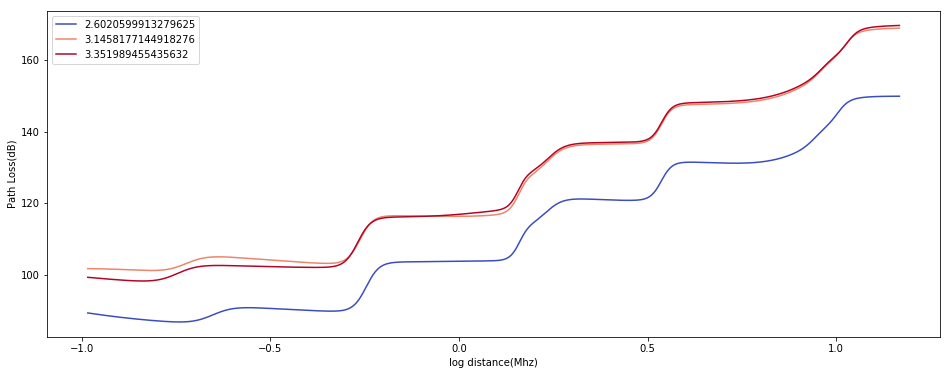

In [4]:
%autoreload

model = pickle.load(open('model/ann_model_1.sav', 'rb'))

graphX = data[0]
graphY = data[1]
# X
# Y
ann_train_graph(model, graphX, graphY, [np.log10(400), np.log10(1399), np.log10(2249)])

In [6]:
ANNPred = model.predict(X)
linearModel = LinearRegression().fit(X,ANNPred)
linearPred = linearModel.predict(X)
print("score:",linearModel.score(X, Y))
print("coefficient:",linearModel.coef_)
print("intercept:",linearModel.intercept_)
prediction_error(ANNPred, linearPred)

score: 0.535215418875493
coefficient: [ 35.65535561 175.03539898   3.92301738   0.           4.32356862]
intercept: 42.83738118237736


4.006211991028895